# Exercise 08

## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline. 
Twitter data was scraped from February of 2015 and contributors were 
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

In [213]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
import zipfile
with zipfile.ZipFile('../datasets/Tweets.zip', 'r') as z:
    f = z.open('Tweets.csv')
    tweets = pd.read_csv(f, index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [214]:
tweets.shape

(14640, 14)

### Proportion of tweets with each sentiment

In [215]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Proportion of tweets per airline


In [216]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

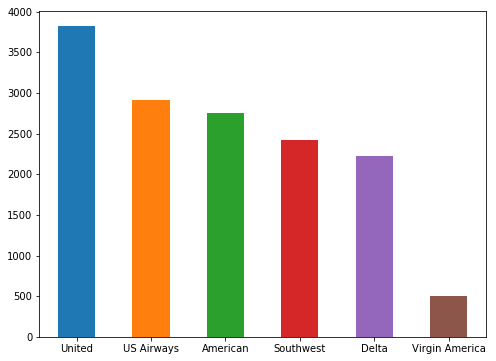

In [217]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

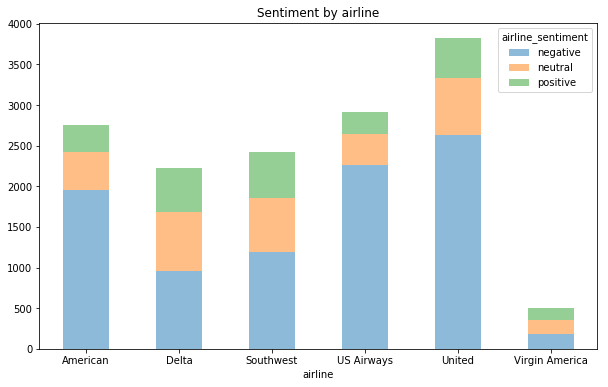

In [218]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

# Exercise 8.1 

Predict the sentiment using CountVectorizer, stopwords, n_grams, stemmer, TfidfVectorizer

use Random Forest classifier

In [219]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from Stemmer import Stemmer

In [220]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [221]:
X.shape

(14640,)

In [227]:
# Para todo este punto, se utilizó el comando TfidfVectorizer.
# Este comando es una combinación de una transformación TFID con CountVectorizer, haciendo innecesario correr este último de nuevo
# Primero, se crea un diccionario de palabras clave.

vect1 = TfidfVectorizer(stop_words="english",max_features=1500)
X_st=vect1.fit(X)

In [228]:
# Con este diccionario, se hallan las raíces de las palabras

stemmer = Stemmer('english')
def stemmy(word):
    words = list(X_st.vocabulary_.keys())
    return [stemmer.stemWord(word) for word in words]

In [233]:
# A continuación, se crea la función de clasificación utilizando un random forest

def tokenize_test(vect):
    X_dtm = vect.fit_transform(X)
    print('Features: ', X_dtm.shape[1])
    rf =RandomForestClassifier()
    print(pd.Series(cross_val_score(rf, X_dtm, y, cv=5)).describe())

In [234]:
# Se define un nuevo vectorizador TFID, esta vez utilizando las raíces como criterio de análisis

vect2 = TfidfVectorizer(stop_words='english',ngram_range=(1,3),analyzer=stemmy)

In [235]:
# Finalmente, se obtienen los resultados

tokenize_test(vect2)

Features:  1193
count    5.000000
mean     0.626913
std      0.000130
min      0.626835
25%      0.626835
50%      0.626835
75%      0.626922
max      0.627136
dtype: float64


# Exercise 8.2

Train a Deep Neural Network with the following architecture:

- Input = text 
- Dense(128)
- Relu Activation
- BatchNormalization
- Dropout(0.5)
- Dense(10, Softmax)

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 55% with 50 epochs)

In [158]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.optimizers import RMSprop
from keras.callbacks import History
from livelossplot import PlotLossesKeras

In [159]:
# remove English stop words
vect = CountVectorizer(stop_words='english',ngram_range=(1, 3),max_features=1500)
X_cv1 = vect.fit_transform(X)
X_cv1.shape
#words = list(X_cv1.vocabulary_.keys())

(14640, 1500)

In [172]:
modeltx = Sequential()
modeltx.add(Dense(128,input_shape=(1500,)))
modeltx.add(Activation('relu'))
modeltx.add(BatchNormalization())
modeltx.add(Dropout(0.67))
modeltx.add(Dense(3))
modeltx.add(Activation('softmax'))
modeltx.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=0.0001),metrics=['accuracy'])
modeltx.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               192128    
_________________________________________________________________
activation_29 (Activation)   (None, 128)               0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 128)               512       
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 3)                 387       
_________________________________________________________________
activation_30 (Activation)   (None, 3)                 0         
Total params: 193,027
Trainable params: 192,771
Non-trainable params: 256
_________________________________________________________________


In [168]:
from keras.utils import to_categorical
y_triple = to_categorical(y,num_classes=3)

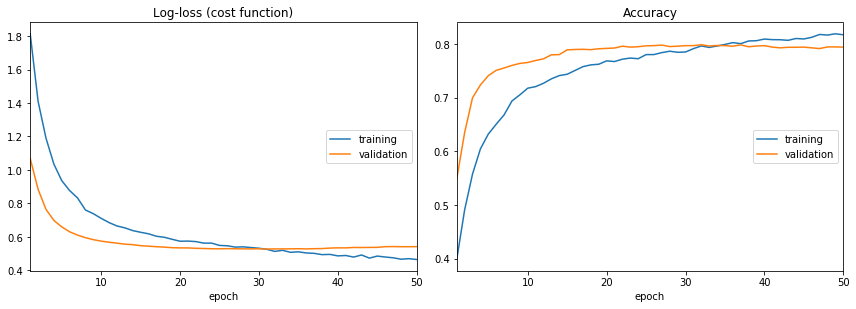

In [173]:
from livelossplot import PlotLossesKeras
history=History()
modeltx.fit(X_cv1, y_triple, epochs=50,callbacks=[history,PlotLossesKeras()],validation_split=0.2)